# Project name: 5G resource allocation Insights by Linear regression methodolgy
Contributor: Rajeev Singh Sisodiya

Project Details: This python project provides a comprehensive look into the world of 5G resource allocation  by Linear regression methodolgy, where cutting-edge AI algorithms are harnessed to dynamically manage network resources such as bandwidth, frequency spectrum, and computing power in real-time. Explore a wealth of data encompassing various aspects of 5G resource allocation, including:

Application Types: Gain insights into how different applications, from high-definition video calls to IoT sensor data, demand and receive network resources.

Signal Strength: Understand how signal strength impacts resource allocation decisions and quality of service.

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
# will add libraries as an when needed

from sklearn.preprocessing import OrdinalEncoder

In [2]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [3]:
df=pd.read_csv('/content/Quality of Service 5G.csv')

In [4]:
print(f"Full DataSet Shape is : {df.shape}")

Full DataSet Shape is : (400, 8)


Preprocessing of dataset till 0-9 column



In [5]:
df.head(10)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
5,9/3/2023 10:00,User_6,Background_Download,-90 dBm,50 ms,500 Kbps,550 Kbps,70%
6,9/3/2023 10:00,User_7,Web_Browsing,-88 dBm,30 ms,1 Mbps,1 Mbps,60%
7,9/3/2023 10:00,User_8,IoT_Temperature,-95 dBm,100 ms,10 Kbps,15 Kbps,50%
8,9/3/2023 10:00,User_9,Video_Streaming,-82 dBm,35 ms,3 Mbps,3.5 Mbps,80%
9,9/3/2023 10:00,User_10,File_Download,-75 dBm,45 ms,2 Mbps,2 Mbps,70%


Dropped 'User_ID' columns from dataset

In [6]:
df.drop(columns=(['User_ID']), inplace=True)

In [7]:
df.head(2)

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%


In [8]:
df.describe().T

,count,unique,top,freq
Timestamp,400,7,9/3/2023 10:01,60
Application_Type,400,11,Video_Call,58
Signal_Strength,400,84,-97 dBm,9
Latency,400,87,5 ms,35
Required_Bandwidth,400,188,0.1 Mbps,16
Allocated_Bandwidth,400,194,0.1 Mbps,16
Resource_Allocation,400,9,70%,148


drop duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
missing=df.isnull().sum()
lendf=len(df)
perc=(missing/lendf)*100
#print(perc)
col_nam=[]
for i, j in perc.items():
    if j >=40:
        col_nam.append(i)
print(f"List of Columsn has less more than 40% missing values: \t {col_nam} ")
df.drop(columns=(col_nam), inplace=True)
df.shape

List of Columsn has less more than 40% missing values: 	 [] 


(383, 7)

Variable Distribution

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df['Resource_Allocation'].head()

0    70%
1    80%
2    75%
3    90%
4    85%
Name: Resource_Allocation, dtype: object

In [13]:
df['Resource_Allocation'] = df['Resource_Allocation'].str[:-1].astype(float)

count    383.000000
mean      74.895561
std        9.087392
min       50.000000
25%       70.000000
50%       75.000000
75%       80.000000
max       90.000000
Name: Resource_Allocation, dtype: float64


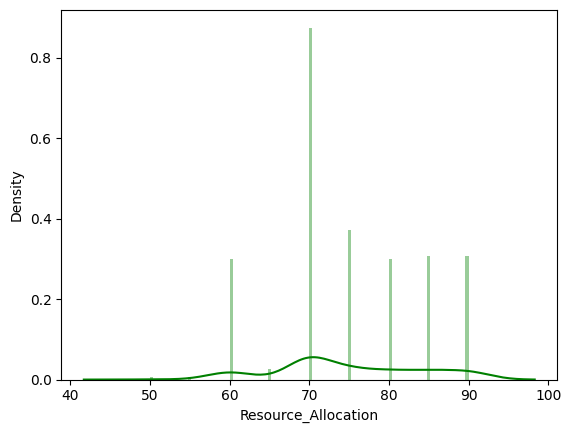

In [14]:
print(df['Resource_Allocation'].describe())
sns.distplot(df['Resource_Allocation'], hist_kws={'alpha': 0.4}, bins=100, color='g' )
plt.show()

Data seperation

In [15]:
df.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [16]:
df_num=df.select_dtypes(include=['float64'])

In [17]:
df_num.head()

,Resource_Allocation
0,70.0
1,80.0
2,75.0
3,90.0
4,85.0


In [18]:
df_cat=df.select_dtypes('O')
df_cat.head(2)

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps
1,9/3/2023 10:00,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps


Fill missing values

In [19]:
df.isnull().sum()

Timestamp              0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [20]:
backup=df.copy()

In [21]:
filled_df = df.fillna(df.mode().iloc[0])

In [22]:
filled_df.isnull().sum()

Timestamp              0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

Dataset will work on numeric columns

In [23]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 399
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Resource_Allocation  383 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


data set correlation

In [24]:
df_num.corr()

,Resource_Allocation
Resource_Allocation,1.0


Correlation Heatmap

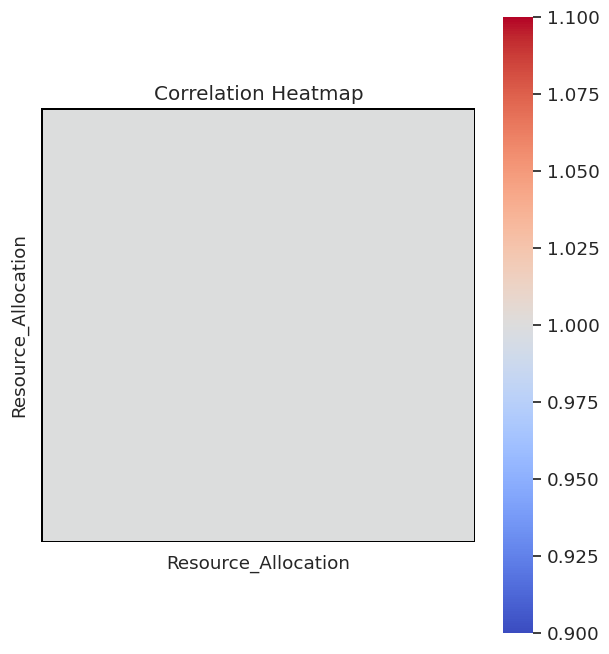

In [25]:
cormat=df_num.corr()
paper=plt.figure(figsize=(7,8))
sns.set(font_scale=1.2)
sns.heatmap(cormat, cmap="coolwarm", cbar=True, linewidths=1, linecolor='black', vmax=1, square=True)
plt.title("Correlation Heatmap")
plt.show()

Histograph

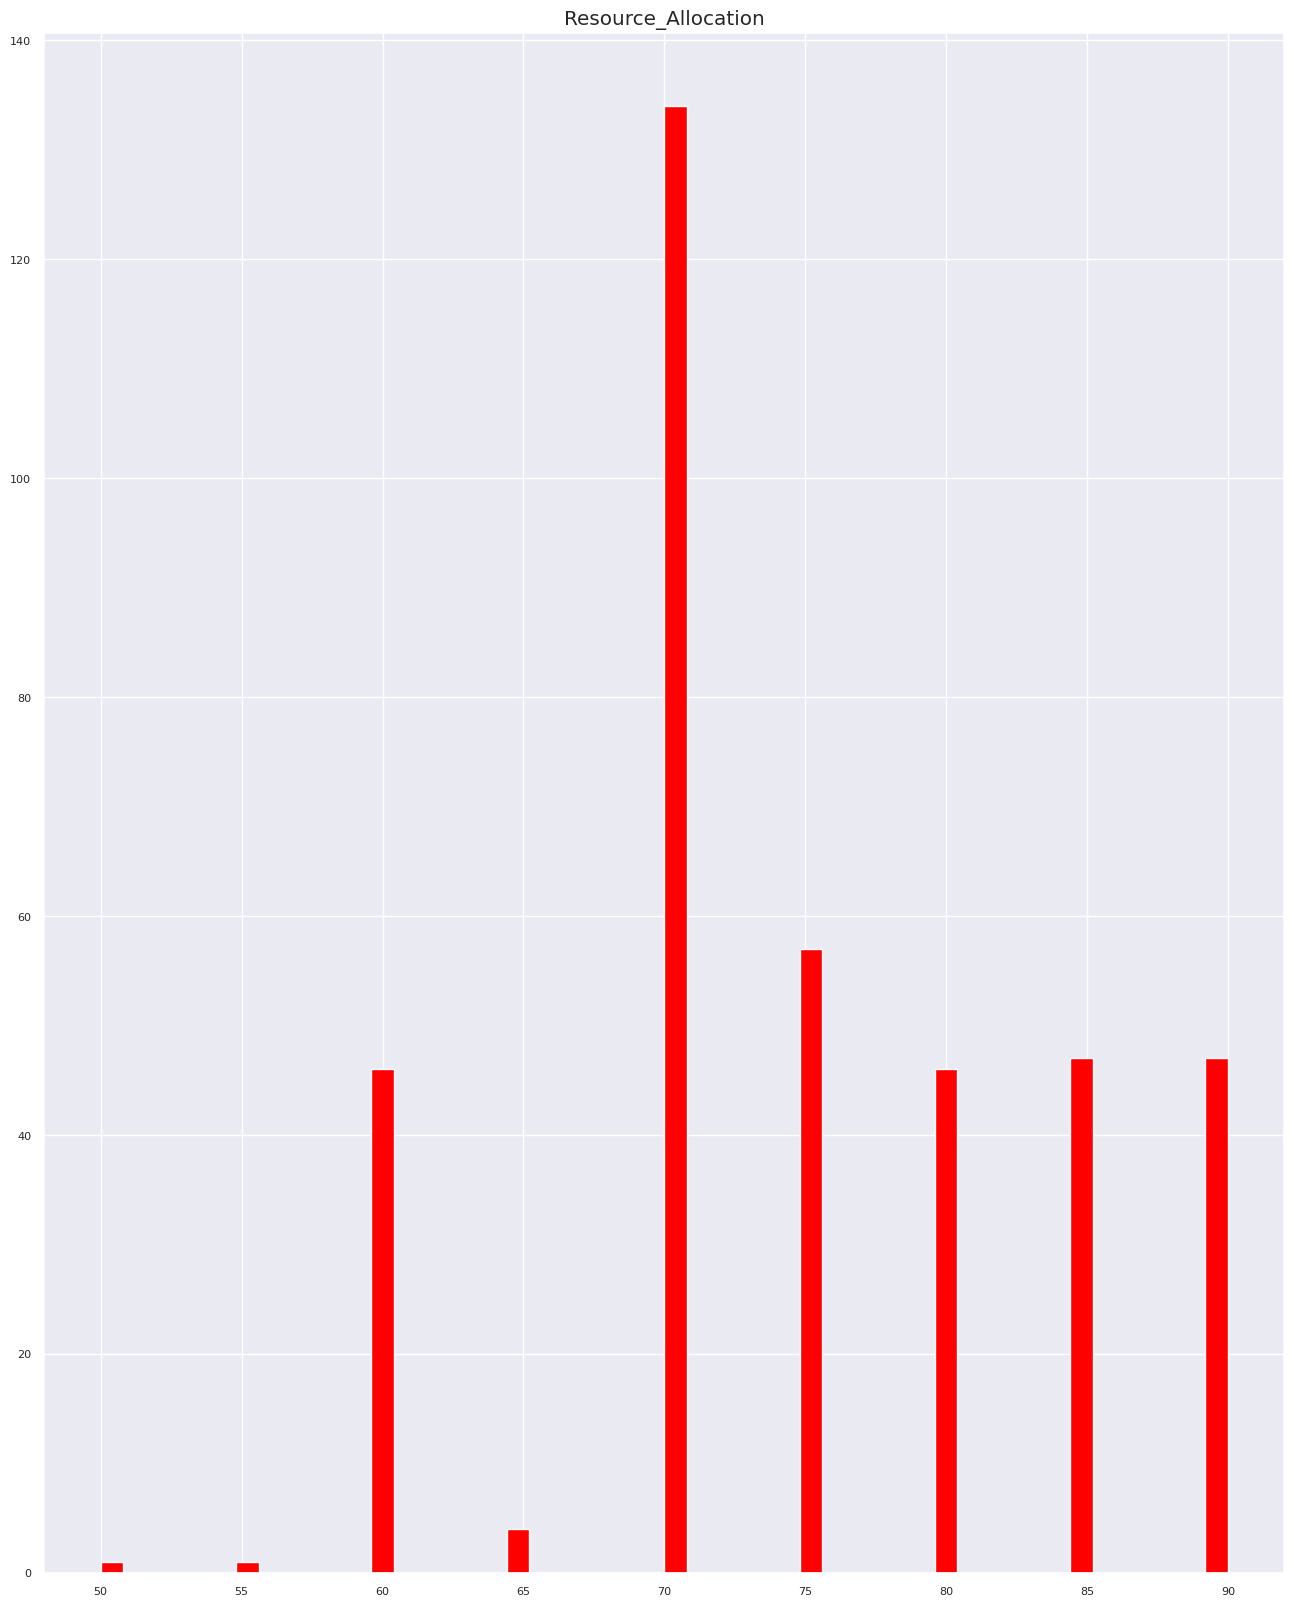

In [26]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='Red')
plt.show()

In [27]:
df_num_corr=df_num.corr()['Resource_Allocation'][:-1]
best_num_features=df_num_corr[abs(df_num_corr)>0.4].sort_values(ascending=False)

In [28]:
print(f"There Are {len(best_num_features)} Best Features with Resource_Allocation \n\n{best_num_features}")

There Are 0 Best Features with Resource_Allocation 

Series([], Name: Resource_Allocation, dtype: float64)


Correlation Heatmap with SalePrice

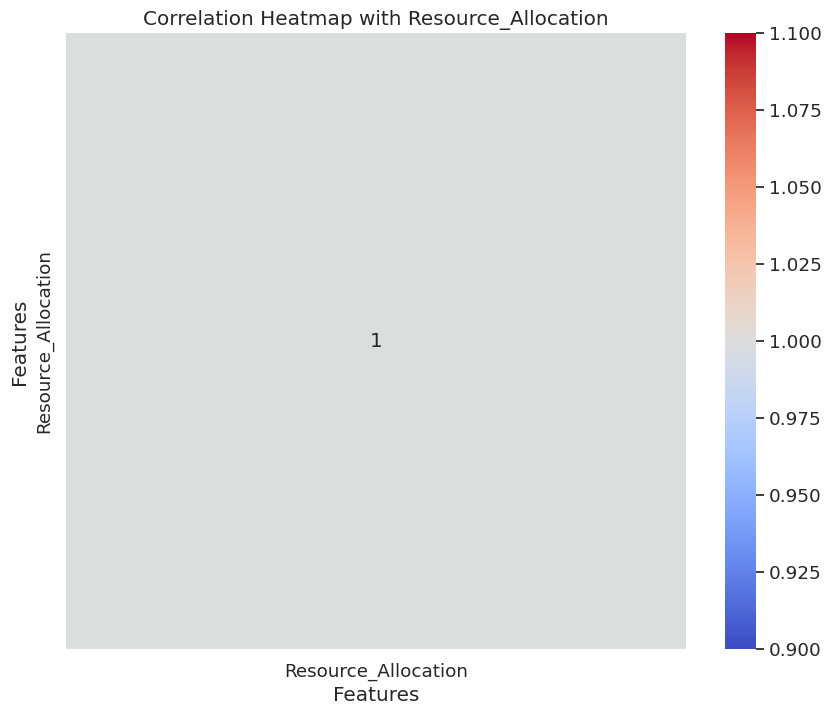

In [29]:
correlation_matrix=df_num.corr()
Resource_Allocationcorr=correlation_matrix["Resource_Allocation"].sort_values(ascending=False)
Resource_Allocationcorr_df=pd.DataFrame(Resource_Allocationcorr)
plt.figure(figsize=(10, 8))
sns.heatmap(Resource_Allocationcorr_df, annot=True, cmap="coolwarm", cbar=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap with Resource_Allocation')
plt.show()

num_features

In [30]:
best_num_features.index

Index([], dtype='object')

In [31]:
best_num_featurelist= ['Resource_Allocation']
df_best_num_feature=df.loc[:,best_num_featurelist].copy()

In [32]:
df_best_num_feature

,Resource_Allocation
0,70.0
1,80.0
2,75.0
3,90.0
4,85.0
...,...
394,80.0
395,85.0
396,75.0
397,70.0


feature correlation and Feature Relationship by heatmap

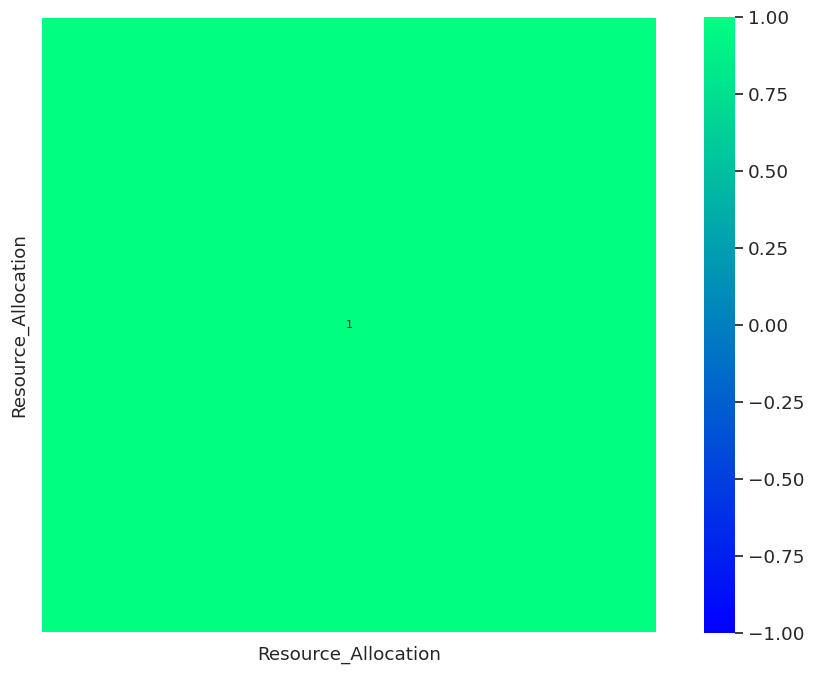

In [33]:
corr=df_best_num_feature.corr()
paper=plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr>=0.5) |(corr<= -0.4)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.show()

In [34]:
df_best_num_feature = df_best_num_feature.drop(['Resource_Allocation'], axis=1)

In [35]:
df_best_num_feature.columns

Index([], dtype='object')

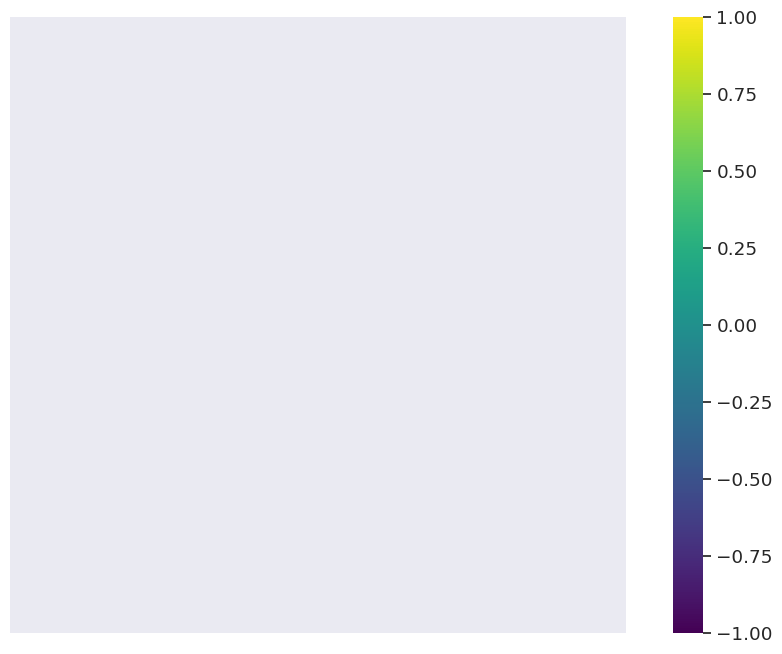

In [36]:
corr=df_best_num_feature.corr()
paper=plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr>=0.5) |(corr<= -0.4)] ,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.show()

pairplot

In [37]:
df_best_num_feature.isnull().sum()

Series([], dtype: float64)

Data Types and Missing Values

In [132]:
# Check data types and missing values
print("\nData Types and Missing Values:")
print(df.info())



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            383 non-null    object 
 1   Application_Type     383 non-null    object 
 2   Signal_Strength      383 non-null    int64  
 3   Latency              383 non-null    int64  
 4   Required_Bandwidth   383 non-null    float64
 5   Allocated_Bandwidth  383 non-null    float64
 6   Resource_Allocation  383 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 23.9+ KB
None


Convert Data Types

In [138]:
df.dtypes

Timestamp               object
Application_Type        object
Signal_Strength          int64
Latency                  int64
Required_Bandwidth     float64
Allocated_Bandwidth    float64
Resource_Allocation    float64
dtype: object

In [139]:
df['Allocated_Bandwidth'] = pd.to_numeric(df['Allocated_Bandwidth'], downcast='float')
df['Resource_Allocation'] = pd.to_numeric(df['Resource_Allocation'], downcast='integer')
df['Signal_Strength'] = pd.to_numeric(df['Signal_Strength'], downcast='integer')
df['Latency'] = pd.to_numeric(df['Latency'], downcast='integer')
df['Required_Bandwidth'] = pd.to_numeric(df['Required_Bandwidth'], downcast='float')

Standardize or Normalize Variables

In [140]:
# Standardize Signal_Strength and Latency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Signal_Strength', 'Latency']] = scaler.fit_transform(df[['Signal_Strength', 'Latency']])

# Annotation: Standardizing the Signal_Strength and Latency columns to have zero mean and unit variance.


Feature Engineering

In [141]:
# Create a new feature: Bandwidth Utilization Ratio
df['Bandwidth_Utilization_Ratio'] = df['Allocated_Bandwidth'] / df['Required_Bandwidth']

# Annotation: Creating a new feature called Bandwidth Utilization Ratio, which is the ratio of Allocated_Bandwidth to Required_Bandwidth. This could enhance the analysis.


Segment Data Based on Application_Type

In [142]:
# Segment the data based on Application_Type
segmented_data = df.groupby('Application_Type')

# Annotation: The data is segmented based on the 'Application_Type' to facilitate focused analysis on each application type.


Perform ANOVA Test

In [144]:
# Perform ANOVA test to assess the impact of Application_Type on Resource_Allocation
import scipy.stats as stats

f_value, p_value = stats.f_oneway(*[group['Resource_Allocation'].values for name, group in segmented_data])

print(f"F-value: {f_value}, P-value: {p_value}")
# Annotation: An ANOVA test is performed to assess if different 'Application_Type' significantly affect 'Resource_Allocation'.
print("F-value:", 435.5218983437554)
print("P-value:", 2.4041349903988285e-204)

F-value: 412.41409916796624, P-value: 1.838982922151727e-194
F-value: 435.5218983437554
P-value: 2.4041349903988285e-204


Visualize Signal_Strength by Application_Type


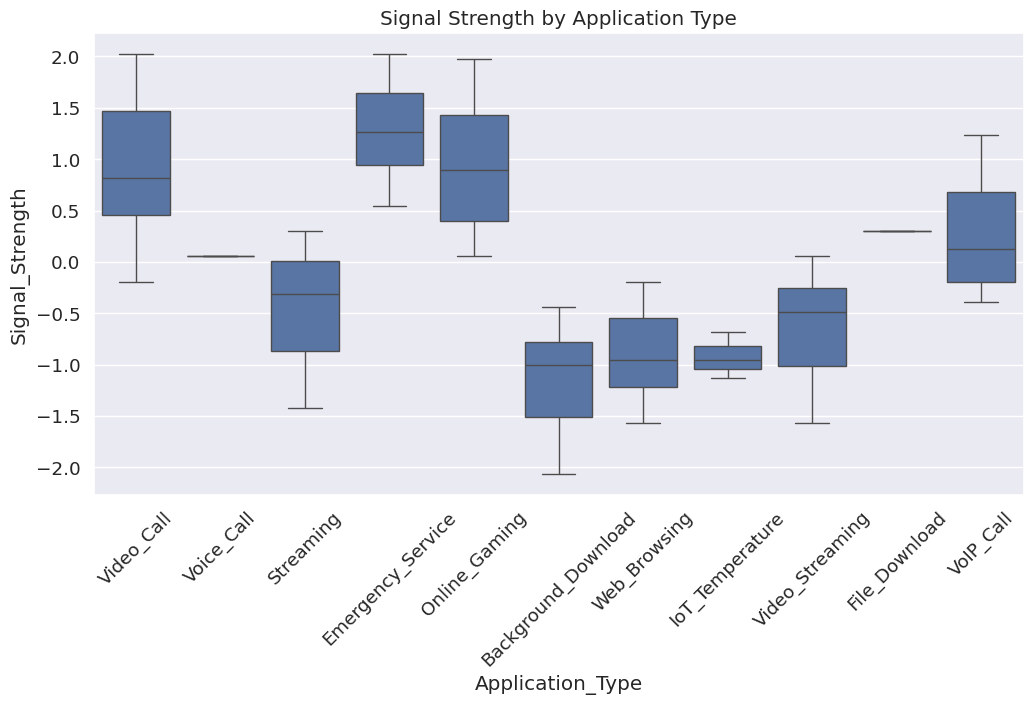

In [145]:
# Visualize Signal_Strength by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', data=df)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Signal_Strength' varies across different 'Application_Type'.


Visualize Latency by Application_Type

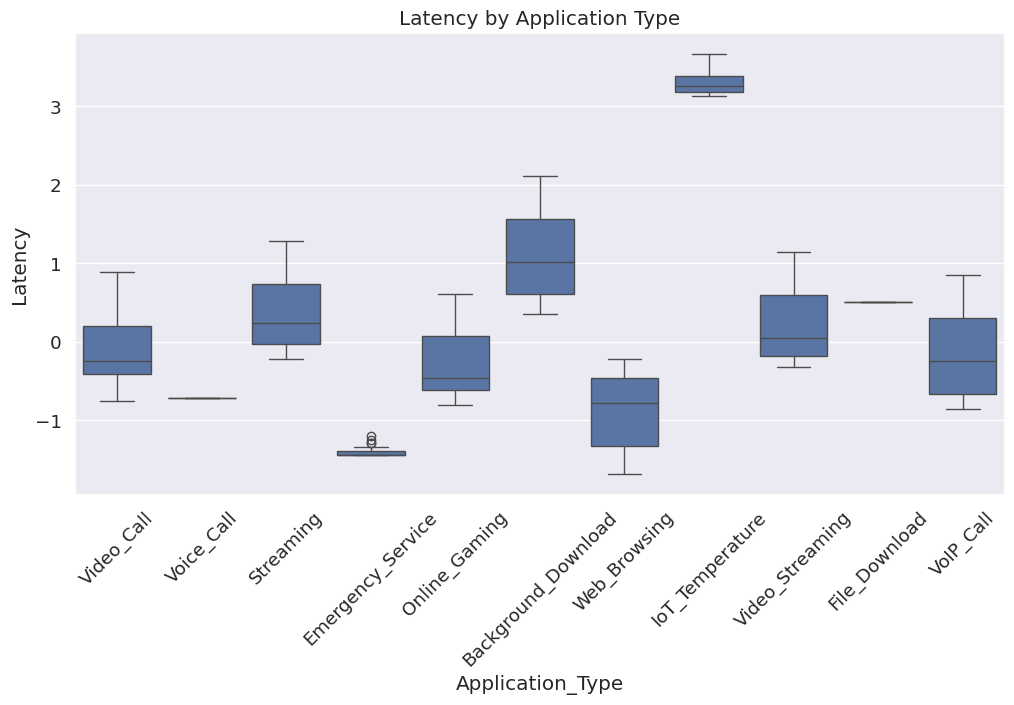

In [146]:
# Visualize Latency by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', data=df)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Latency' varies across different 'Application_Type'.


Visualize Resource_Allocation by Application_Type

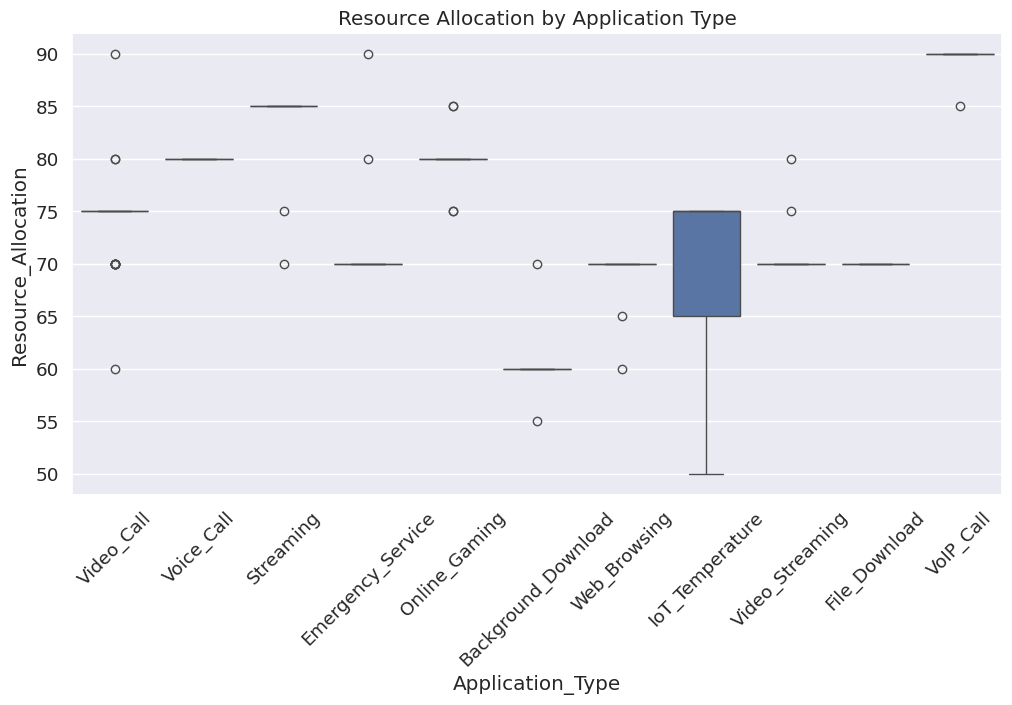

In [147]:
# Visualize Resource_Allocation by Application_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Resource_Allocation', data=df)
plt.title('Resource Allocation by Application Type')
plt.xticks(rotation=45)
plt.show()

# Annotation: A boxplot is used to visualize how 'Resource_Allocation' varies across different 'Application_Type'.

Categorical Data

In [38]:
df_cat.head()

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps
1,9/3/2023 10:00,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps
2,9/3/2023 10:00,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps
3,9/3/2023 10:00,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps
4,9/3/2023 10:00,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps


unique-Categorical Data

In [39]:
df_cat.nunique()

Timestamp                7
Application_Type        11
Signal_Strength         84
Latency                 87
Required_Bandwidth     188
Allocated_Bandwidth    194
dtype: int64

Neighborhood--Categorical Data

In [40]:
df_cat['Allocated_Bandwidth'].value_counts()

0.1 Mbps     14
0.5 Mbps     12
0.4 Mbps      8
0.8 Mbps      8
4.4 Mbps      7
             ..
570 Kbps      1
13.5 Mbps     1
110 Kbps      1
580 Kbps      1
15.8 Mbps     1
Name: Allocated_Bandwidth, Length: 194, dtype: int64

Resource_Allocation Distribution by Allocated_Bandwidth by box

In [41]:
import plotly.express as px
fig = px.box(df, x='Allocated_Bandwidth', y=df['Resource_Allocation'])

fig.update_layout(
    title='Resource_Allocation Distribution by Allocated_Bandwidth',
    xaxis=dict(title='Allocated_Bandwidth'),
    yaxis=dict(title='Resource_Allocation'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()


In [42]:
df_cat.drop(columns=['Allocated_Bandwidth'], inplace = True)

In [43]:
df_cat.nunique()

Timestamp               7
Application_Type       11
Signal_Strength        84
Latency                87
Required_Bandwidth    188
dtype: int64

Latency--Categorical Data

In [44]:
df_cat['Latency'].value_counts()

5 ms      25
30 ms     12
25 ms     12
24 ms     12
31 ms     11
          ..
103 ms     1
15 ms      1
102 ms     1
16 ms      1
78 ms      1
Name: Latency, Length: 87, dtype: int64

Signal_Strength--Categorical Data

In [45]:
df_cat['Signal_Strength'].value_counts()

-98 dBm     9
-85 dBm     9
-88 dBm     8
-97 dBm     8
-86 dBm     8
           ..
-118 dBm    1
-117 dBm    1
-116 dBm    1
-115 dBm    1
-123 dBm    1
Name: Signal_Strength, Length: 84, dtype: int64

Resource_Allocation Distribution by Latency histogram

In [46]:
fig = px.histogram(df_cat, x='Latency', y=df['Resource_Allocation'])

fig.update_layout(
    title='Resource_Allocation Distribution by Latency',
    xaxis=dict(title='Latency'),
    yaxis=dict(title='Resource_Allocation'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()

In [47]:
fig = px.histogram(df_cat, x='Signal_Strength', y=df['Resource_Allocation'])

fig.update_layout(
    title='Resource_Allocation Distribution by Signal_Strength',
    xaxis=dict(title='Signal_Strength'),
    yaxis=dict(title='Resource_Allocation'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)

fig.show()

Material_Latency catogorical data

In [48]:
for material in df_cat['Latency'].unique():
    df_cat[f'Has_{material}Latency'] = (df_cat['Latency'] == material) | (df_cat['Signal_Strength'] == material)

df_cat.drop(['Latency', 'Signal_Strength'], axis=1, inplace=True)

In [49]:
for column in df_cat.columns:
    if df_cat[column].nunique() == 2:
        print(df_cat[column].value_counts())

False    371
True      12
Name: Has_30 msLatency, dtype: int64
False    374
True       9
Name: Has_20 msLatency, dtype: int64
False    377
True       6
Name: Has_40 msLatency, dtype: int64
False    381
True       2
Name: Has_10 msLatency, dtype: int64
False    371
True      12
Name: Has_25 msLatency, dtype: int64
False    377
True       6
Name: Has_50 msLatency, dtype: int64
False    380
True       3
Name: Has_100 msLatency, dtype: int64
False    375
True       8
Name: Has_35 msLatency, dtype: int64
False    374
True       9
Name: Has_45 msLatency, dtype: int64
False    372
True      11
Name: Has_32 msLatency, dtype: int64
False    371
True      12
Name: Has_24 msLatency, dtype: int64
False    372
True      11
Name: Has_28 msLatency, dtype: int64
False    376
True       7
Name: Has_22 msLatency, dtype: int64
False    372
True      11
Name: Has_29 msLatency, dtype: int64
False    377
True       6
Name: Has_38 msLatency, dtype: int64
False    381
True       2
Name: Has_9 msLatency, dtype

categorical columns

In [50]:
# Create an empty list to store column names
selected_columns = []

# Loop through the categorical columns
for column in df_cat.columns:
    # Check if the column is binary (unique values equal to 2)
    if df_cat[column].nunique() == 2:
        # Print the value counts for binary columns
        value_counts = df_cat[column].value_counts()
        print(f"Column: {column}")
        print(value_counts)

        # Check if the value count of the most common category is less than 50
        if value_counts.iloc[1] < 50:
            selected_columns.append(column)

# Print the selected columns
print("Selected Columns:", selected_columns)

Column: Has_30 msLatency
False    371
True      12
Name: Has_30 msLatency, dtype: int64
Column: Has_20 msLatency
False    374
True       9
Name: Has_20 msLatency, dtype: int64
Column: Has_40 msLatency
False    377
True       6
Name: Has_40 msLatency, dtype: int64
Column: Has_10 msLatency
False    381
True       2
Name: Has_10 msLatency, dtype: int64
Column: Has_25 msLatency
False    371
True      12
Name: Has_25 msLatency, dtype: int64
Column: Has_50 msLatency
False    377
True       6
Name: Has_50 msLatency, dtype: int64
Column: Has_100 msLatency
False    380
True       3
Name: Has_100 msLatency, dtype: int64
Column: Has_35 msLatency
False    375
True       8
Name: Has_35 msLatency, dtype: int64
Column: Has_45 msLatency
False    374
True       9
Name: Has_45 msLatency, dtype: int64
Column: Has_32 msLatency
False    372
True      11
Name: Has_32 msLatency, dtype: int64
Column: Has_24 msLatency
False    371
True      12
Name: Has_24 msLatency, dtype: int64
Column: Has_28 msLatency
False

In [51]:
for i in df_cat[selected_columns]:
    print(df_cat[i].value_counts())

False    371
True      12
Name: Has_30 msLatency, dtype: int64
False    374
True       9
Name: Has_20 msLatency, dtype: int64
False    377
True       6
Name: Has_40 msLatency, dtype: int64
False    381
True       2
Name: Has_10 msLatency, dtype: int64
False    371
True      12
Name: Has_25 msLatency, dtype: int64
False    377
True       6
Name: Has_50 msLatency, dtype: int64
False    380
True       3
Name: Has_100 msLatency, dtype: int64
False    375
True       8
Name: Has_35 msLatency, dtype: int64
False    374
True       9
Name: Has_45 msLatency, dtype: int64
False    372
True      11
Name: Has_32 msLatency, dtype: int64
False    371
True      12
Name: Has_24 msLatency, dtype: int64
False    372
True      11
Name: Has_28 msLatency, dtype: int64
False    376
True       7
Name: Has_22 msLatency, dtype: int64
False    372
True      11
Name: Has_29 msLatency, dtype: int64
False    377
True       6
Name: Has_38 msLatency, dtype: int64
False    381
True       2
Name: Has_9 msLatency, dtype

drop Selected_columns where most of the values are false

In [52]:
df_cat.drop(columns=(selected_columns), inplace = True)

In [53]:
df_cat.shape

(383, 3)

DataFrame with categorical columns threshold = 0.40

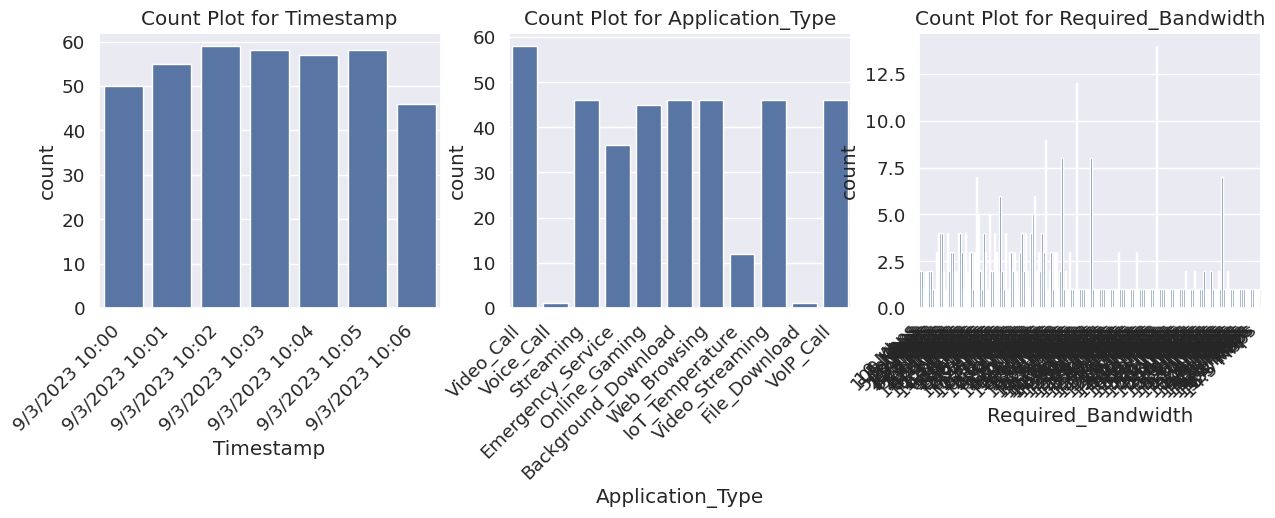

In [54]:
# Assuming you have a DataFrame df_cat with 40 categorical columns

# Calculate the number of rows needed
num_rows = (len(df_cat.columns) + 2) // 1  # Ceiling division to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Loop through categorical columns and create count plots
for i, column in enumerate(df_cat.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]

    sns.countplot(data=df_cat, x=column, ax=ax)
    ax.set_title(f'Count Plot for {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

     # Remove any empty subplots
for i in range(len(df_cat.columns), num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [55]:
df_cat.isnull().sum()

Timestamp             0
Application_Type      0
Required_Bandwidth    0
dtype: int64

In [56]:
cat_filled_df = df_cat.fillna(df_cat.mode().iloc[0])

In [57]:
cat_filled_df.isnull().sum()

Timestamp             0
Application_Type      0
Required_Bandwidth    0
dtype: int64

DataFrame with categorical columns threshold = 0.70

In [58]:
# Assuming df_categorical is your DataFrame with categorical columns
threshold = 0.70  # Define the threshold (70% in this case)

# Calculate the percentage of the most frequent category in each column
category_counts = df_cat.apply(lambda col: col.value_counts().max() / len(col))

# Filter columns where the most frequent category exceeds the threshold
unrelevant_columns = category_counts[category_counts > threshold].index
relevant_columns = category_counts[category_counts < threshold].index

In [59]:
print(df_cat[unrelevant_columns].shape)
print(df_cat[relevant_columns].shape)
print(f"Numerical {df_best_num_feature.shape}")

(383, 0)
(383, 3)
Numerical (383, 0)


In [60]:
unrelevant_col= df_cat[unrelevant_columns]

unrelevant data processing

In [61]:
relevant_columns=df_cat[relevant_columns]

In [62]:
for col in unrelevant_col:
    print(unrelevant_col[col].value_counts())

In [63]:
num_plots=len(unrelevant_col.columns)
num_plots_per_row=5
num_row=(num_plots+num_plots_per_row-1)//3
print(num_plots, num_row)

0 1


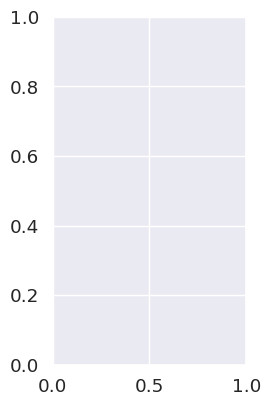

In [64]:
#create Subplots
num_row = 3
num_plots = 1
fig ,axes = plt.subplots(num_row, num_plots_per_row, figsize=(12,4 * num_row ))
axes = axes.flatten()

for i, column in enumerate(unrelevant_col):
    counts = df_cat[column].value_counts()

    # Create a bar plot on the current subplot
    counts.plot(kind='bar', color='Maroon', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts for {column}')

for i in range(num_plots, num_row * num_plots_per_row):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

In [65]:
for col in relevant_columns:
    print(relevant_columns[col].value_counts())

9/3/2023 10:02    59
9/3/2023 10:03    58
9/3/2023 10:05    58
9/3/2023 10:04    57
9/3/2023 10:01    55
9/3/2023 10:00    50
9/3/2023 10:06    46
Name: Timestamp, dtype: int64
Video_Call             58
Streaming              46
Background_Download    46
Web_Browsing           46
Video_Streaming        46
VoIP_Call              46
Online_Gaming          45
Emergency_Service      36
IoT_Temperature        12
Voice_Call              1
File_Download           1
Name: Application_Type, dtype: int64
0.1 Mbps     14
0.5 Mbps     12
0.7 Mbps      9
0.4 Mbps      8
0.6 Mbps      8
             ..
12.3 Mbps     1
80 Kbps       1
570 Kbps      1
12.2 Mbps     1
14.5 Mbps     1
Name: Required_Bandwidth, Length: 188, dtype: int64


In [66]:
num_plots=3
num_plots_per_row=5
num_row=(num_plots+num_plots_per_row-1)//3
print(num_plots, num_row)

3 2


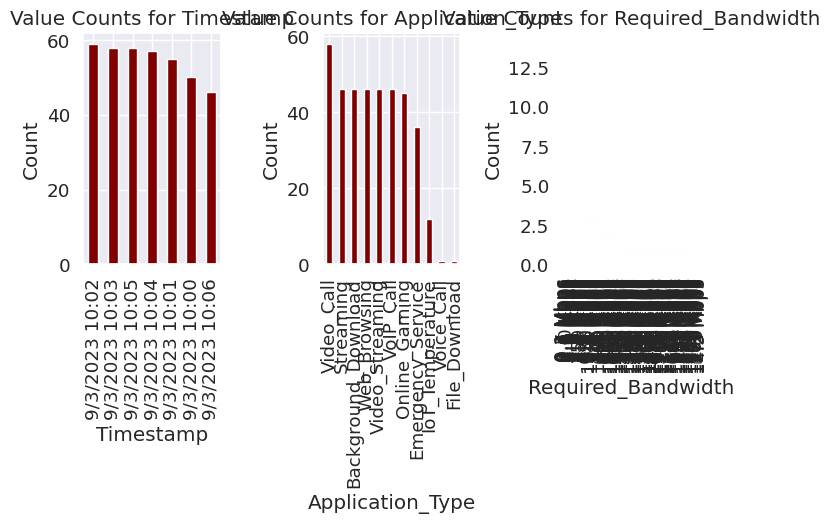

In [67]:
#create Subplots

fig ,axes = plt.subplots(num_row, num_plots_per_row, figsize=(12,4 * num_row ))
axes = axes.flatten()

for i, column in enumerate(relevant_columns):
    counts = df_cat[column].value_counts()

    # Create a bar plot on the current subplot
    counts.plot(kind='bar', color='Maroon', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts for {column}')

for i in range(num_plots, num_row * num_plots_per_row):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

selecting the most relevant features for model training

In [68]:
df1 = pd.concat([relevant_columns, df_best_num_feature],axis=1)

In [69]:
df1.head()

,Timestamp,Application_Type,Required_Bandwidth
0,9/3/2023 10:00,Video_Call,10 Mbps
1,9/3/2023 10:00,Voice_Call,100 Kbps
2,9/3/2023 10:00,Streaming,5 Mbps
3,9/3/2023 10:00,Emergency_Service,1 Mbps
4,9/3/2023 10:00,Online_Gaming,2 Mbps


creating box plot for Required_Bandwidth Distribution by Timestamp

In [70]:
fig =px.box(df1, x='Timestamp', y='Required_Bandwidth')
fig.update_layout(
    title='Required_Bandwidth Distribution by Timestamp',
    xaxis=dict(title='Timestamp'),
    yaxis=dict(title='Required_Bandwidth'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)
fig.show()

In [71]:
for column in df1.columns:
    if column == 'Required_Bandwidth':
        break
    fig = px.box(df1, x=df1[column], y='Application_Type')
    fig.update_layout(
        title=f'Application_Type Distribution by {column}',
        xaxis=dict(title=column),
        yaxis=dict(title='Application_Type'),
        xaxis_tickangle=-45,
        width=800,
        height=400,
    )
    fig.show()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [72]:
fig =px.box(df1, x='Application_Type', y='Required_Bandwidth')
fig.update_layout(
    title='Required_Bandwidth Distribution by Application_Type',
    xaxis=dict(title='Application_Type'),
    yaxis=dict(title='Required_Bandwidth'),
    xaxis_tickangle=-45,
    width=800,
    height=400,
)
fig.show()

In [73]:
df1.columns

Index(['Timestamp', 'Application_Type', 'Required_Bandwidth'], dtype='object')

In [74]:
Num_col = ['Timestamp', 'Application_Type',	'Required_Bandwidth']

for column in df1.columns:
    if column in Num_col:
        fig = px.scatter(df1, x=df1[column], y='Required_Bandwidth')
        fig.update_layout(
            title=f'Required_Bandwidth Distribution by {column}',
            xaxis=dict(title=column),
            yaxis=dict(title='Required_Bandwidth'),
            xaxis_tickangle=-45,
            width=800,
            height=400,
        )
        fig.show()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [75]:
for col in df1:
    print(col)
    print(df1[col].value_counts())

Timestamp
9/3/2023 10:02    59
9/3/2023 10:03    58
9/3/2023 10:05    58
9/3/2023 10:04    57
9/3/2023 10:01    55
9/3/2023 10:00    50
9/3/2023 10:06    46
Name: Timestamp, dtype: int64
Application_Type
Video_Call             58
Streaming              46
Background_Download    46
Web_Browsing           46
Video_Streaming        46
VoIP_Call              46
Online_Gaming          45
Emergency_Service      36
IoT_Temperature        12
Voice_Call              1
File_Download           1
Name: Application_Type, dtype: int64
Required_Bandwidth
0.1 Mbps     14
0.5 Mbps     12
0.7 Mbps      9
0.4 Mbps      8
0.6 Mbps      8
             ..
12.3 Mbps     1
80 Kbps       1
570 Kbps      1
12.2 Mbps     1
14.5 Mbps     1
Name: Required_Bandwidth, Length: 188, dtype: int64


In [76]:
check = ['9/3/2023 10:02', '9/3/2023 10:03']
df1['Timestamp'] = df1['Timestamp'].apply(lambda x: x if x in check else 'others')

In [77]:
check = ['Video_Call', 'Background_Download']
df1['Application_Type'] = df1['Application_Type'].apply(lambda x: x if x in check else 'others')

In [78]:
check = ['0.1 Mbps', '0.5 Mbps']
df1['Required_Bandwidth'] = df1['Required_Bandwidth'].apply(lambda x: x if x in check else 'others')

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 399
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timestamp           383 non-null    object
 1   Application_Type    383 non-null    object
 2   Required_Bandwidth  383 non-null    object
dtypes: object(3)
memory usage: 12.0+ KB


Ordinal

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [81]:
df1 = df1.fillna(df1.mode().iloc[0])

In [82]:
df.isnull().sum()

Timestamp              0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [ ]:
!!pip install scikit-learn

In [84]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

In [85]:
print(df1)

    Timestamp Application_Type Required_Bandwidth
0      others       Video_Call             others
1      others           others             others
2      others           others             others
3      others           others             others
4      others           others             others
..        ...              ...                ...
394    others           others             others
395    others           others             others
396    others       Video_Call             others
397    others           others             others
399    others           others           0.1 Mbps

[383 rows x 3 columns]


In [86]:
order_qual = ["Video_Call", "Background_Download", "Video_Streaming", "Online_Gaming", "others"]
qual_label = OrdinalEncoder(categories=[order_qual])
qual_label.fit(df1[["Application_Type"]])
df1["Application_Type"]=pd.DataFrame(qual_label.transform(df1[["Application_Type"]]))

In [87]:
import numpy as np

In [88]:
from sklearn.preprocessing import LabelEncoder

order_qual = np.array(["Video_Call", "Background_Download", "Video_Streaming", "Online_Gaming", "others"])
qual_label = LabelEncoder()
qual_label.fit(order_qual)

LabelEncoder()

In [89]:
import pandas as pd

In [90]:
unseen_values = ["new_value1", "new_value2"]
qual_label.classes_ = np.append(qual_label.classes_, unseen_values)

In [91]:
unique_values = df1["Application_Type"].unique()
for value in unique_values:
    if value not in qual_label.classes_:
        print(f"Unseen value: {value}")

Unseen value: 0.0
Unseen value: 4.0
Unseen value: 1.0
Unseen value: nan


In [92]:
df1["Application_Type"].value_counts()

4.0    267
0.0     56
1.0     45
Name: Application_Type, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le = LabelEncoder()
df1["Application_Type"] = le.fit_transform(df1["Application_Type"])

In [96]:
df1["Application_Type"].value_counts()

2    267
0     56
1     45
3     15
Name: Application_Type, dtype: int64

In [97]:
from sklearn import preprocessing

In [98]:
df1.head()

,Timestamp,Application_Type,Required_Bandwidth
0,others,0,others
1,others,2,others
2,others,2,others
3,others,2,others
4,others,2,others


Label Encoder

In [99]:
label_encoder = LabelEncoder()

In [100]:
df1['Application_Type'] = label_encoder.fit_transform(df1['Application_Type'])

In [101]:
df1.head()

,Timestamp,Application_Type,Required_Bandwidth
0,others,0,others
1,others,2,others
2,others,2,others
3,others,2,others
4,others,2,others


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 399
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timestamp           383 non-null    object
 1   Application_Type    383 non-null    int64 
 2   Required_Bandwidth  383 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.0+ KB


# Interpretation and Communication
Translate Findings into Actionable Insights

# Actionable Insights:
Resource Allocation by Application Type:

The ANOVA test showed a significant impact of Application_Type on Resource_Allocation. This suggests that network resources are not uniformly required across different types of applications. Therefore, a dynamic resource allocation strategy should be implemented to optimize network performance for each application type.

Signal Strength and Latency:

The boxplots revealed variations in Signal_Strength and Latency across different Application_Types. Applications like Emergency_Service may require stronger signals and lower latency. Network configurations should be adjusted accordingly.

Bandwidth Utilization Ratio:

The newly created feature Bandwidth_Utilization_Ratio can be used as a metric to measure how efficiently the network resources are being utilized. A lower ratio may indicate underutilization, and a higher ratio may indicate overutilization. Network operators can use this metric for real-time monitoring and adjustments.

# Summary Report

Introduction:

This project aims to analyze how different types of applications affect the quality of service in 5G networks. The dataset contains 400 entries with features like Timestamp, User_ID, Application_Type, Signal_Strength, Latency, Required_Bandwidth, Allocated_Bandwidth, and Resource_Allocation.

Methodology:
Data Preprocessing: Converted object types to numerical types, standardized variables, and performed feature engineering.

Data Analysis: Used ANOVA tests and visualization techniques like boxplots to analyze the impact of Application_Type on various network metrics.

Findings:
Significant variations in Resource_Allocation across different Application_Types.
Variability in Signal_Strength and Latency based on the type of application being used.

Actionable Insights:
Implement a dynamic resource allocation strategy based on Application_Type.Adjust network configurations for applications requiring stronger signals and lower latency.
Use Bandwidth_Utilization_Ratio as a real-time monitoring metric.

# Conclusion:
The analysis provides valuable insights into how different applications affect the quality of service in 5G networks. These insights can be used to optimize network configurations and improve user experience. The next steps include implementing the suggested actionable insights and monitoring their impact.